In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import json

In [5]:
# read DNI and land availability data
potentialdf = pd.read_csv('/Users/bstanisl/OneDrive - NREL/Documents/onsite-energy/county_rural_ten_percent_results_20200330.csv')
potentialdf

,County FIPS,County Area km2,County Available area km2,Percent County Land Available,Average Available DNI kWh/m2day
0,1001,1565.3898,603.1989,38.533463,5.074283
1,1003,4224.4092,1666.1214,39.440341,5.110459
2,1005,2342.7144,795.0879,33.938746,5.176540
3,1007,1621.7739,317.9979,19.608029,4.995049
4,1009,1685.1078,696.4623,41.330430,4.909395
...,...,...,...,...,...
3103,56037,27172.0818,21691.5408,79.830250,6.058815
3104,56039,10922.7204,109.4634,1.002162,4.863577
3105,56041,5408.2890,3536.9784,65.399212,5.954247
3106,56043,5808.5991,3734.4969,64.292557,5.753122


In [2]:
# read metadata
f = open('/Users/bstanisl/OneDrive - NREL/Documents/onsite-energy/mfg_eu_temps_meta.json')
jsondata = json.load(f)
jsondata

{'COUNTY_FIPS': {'description': 'County Federal Information Processing Standard county code, 2014 vintage',
  'units': 'None',
  'dtype': 'int32'},
 'Emp_Size': {'description': 'Employment size class bins',
  'units': 'Number of employees',
  'dtype': 'object'},
 'MECS_FT': {'description': 'Fuel type categorized by Manufacturing Energy Consumption Survey definition',
  'units': 'None',
  'dtype': 'object'},
 'MECS_Region': {'description': 'Geographic region categorized by Manufacturing Energy Consumption Survey definition. Equivalent to Census Region',
  'units': 'None',
  'dtype': 'object'},
 'data_source': {'description': 'Data source of energy estimates. GHGRP denotes facility-level estimates from the Greenhouse Gas Reporting Program. ipf denotes estimates from 2014 Manufacturing Energy Consumption Survey.',
  'units': 'None',
  'dtype': 'object'},
 'est_count': {'description': 'Number of establishments by NAICS-Emp_size combination per county',
  'units': 'Establishments',
  'dtype

In [6]:
# load in solar thermal data
# filepath = '/Users/bstanisl/OneDrive - NREL/Documents/onsite-energy/mfg_eu_temps_20200826_2224.csv'
# solarthermaldf = gpd.read_file(filepath,crs=4326)
solarthermaldf = pd.read_pickle("./solarthermaldf.pkl")  

In [7]:
solarthermaldf

,COUNTY_FIPS,Emp_Size,MECS_FT,MECS_Region,data_source,est_count,fipstate,naics,End_use,Temp_C,MMBtu,geometry
0,17001,n100_249,Diesel,Midwest,mecs_ipf,1.0,17,311119,CHP and/or Cogeneration Process,65.91961428571429,13.796296154359094,None
1,17001,n100_249,Diesel,Midwest,mecs_ipf,1.0,17,311119,CHP and/or Cogeneration Process,86.64326666666666,27.59259230871819,None
2,17001,n100_249,Diesel,Midwest,mecs_ipf,1.0,17,311119,CHP and/or Cogeneration Process,97.35735,13.796296154359094,None
3,17001,n1_49,Diesel,Midwest,mecs_ipf,1.0,17,311119,CHP and/or Cogeneration Process,65.91961428571429,1.8311128038731703,None
4,17001,n1_49,Diesel,Midwest,mecs_ipf,1.0,17,311119,CHP and/or Cogeneration Process,86.64326666666666,3.6622256077463406,None
...,...,...,...,...,...,...,...,...,...,...,...,...
3187300,56041,ghgrp,Other,West,ghgrp,1.0,56,324110,Process Heating,142.0,458.0982713886175,None
3187301,56041,ghgrp,Other,West,ghgrp,1.0,56,324110,Process Heating,538.0,4993.271158135931,None
3187302,56041,ghgrp,Other,West,ghgrp,1.0,56,324110,Process Heating,482.0,888.7106464939179,None
3187303,56043,ghgrp,Natural_gas,West,ghgrp,1.0,56,311313,Process Heating,316.0,16470.72509009467,None


In [8]:
# # save dataframe to pickle to save 5-min read-time of csv in the future
# solarthermaldf.to_pickle("./solarthermaldf.pkl")  

In [30]:
solarthermaldf['MMBtu'] = solarthermaldf['MMBtu'].astype(float)
solarthermaldf['Temp_C'] = solarthermaldf['Temp_C'].astype(float)

# correct single digit fips codes to 0#
solarthermaldf.loc[solarthermaldf['fipstate'].astype(int) < 10, 'COUNTY_FIPS'] = '0' + solarthermaldf.loc[solarthermaldf['fipstate'].astype(int) < 10, 'COUNTY_FIPS']

In [17]:
# correct single digit fips codes to 0#
potentialdf['COUNTY_FIPS'] = potentialdf['County FIPS'].astype(str)
potentialdf.loc[potentialdf['County FIPS'] < 10000, 'COUNTY_FIPS'] = '0' + potentialdf.loc[potentialdf['County FIPS'] < 10000, 'COUNTY_FIPS']

In [31]:
# group by county - add up demand in MBtu
# easier to do this groupby operation on the pandas df, not the geopandas df and then merge later
demandbycounty = solarthermaldf.groupby(['COUNTY_FIPS']).sum(numeric_only=True)
demandbycounty['TBtu'] = demandbycounty['MMBtu']/(10**6)
demandbycounty

,Temp_C,MMBtu,TBtu
COUNTY_FIPS,,,
01001,89052.392800,2.061064e+07,20.610640
01003,460809.349300,1.542045e+06,1.542045
01005,114560.237489,8.424808e+05,0.842481
01007,88337.715942,9.146056e+04,0.091461
01009,116189.960717,1.554885e+05,0.155489
...,...,...,...
56037,211059.848002,3.496764e+07,34.967639
56039,128467.701129,2.055815e+04,0.020558
56041,109255.457938,1.383381e+06,1.383381


In [35]:
# merge technical potential df with solar thermal demand df
data = demandbycounty.merge(potentialdf, on='COUNTY_FIPS')

In [4]:
# split_pos = 2

# # Extract first part using slicing
# solarthermal['STATEFP'] = solarthermal['COUNTY_FIPS'].str[:split_pos]

# # Extract second part using slicing
# solarthermal['COUNTYFP'] = solarthermal['COUNTY_FIPS'].str[split_pos:]

In [32]:
# load in county shp file data
shpfilepath = '/Users/bstanisl/OneDrive - NREL/Documents/onsite-energy/tl_2023_us_county/tl_2023_us_county.shp'
counties = gpd.GeoDataFrame.from_file(shpfilepath)

In [33]:
# add common column for county fips code
counties['COUNTY_FIPS'] = counties['STATEFP']+counties['COUNTYFP']
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,COUNTY_FIPS
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914...",31039
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2...",53069
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0...",35011
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523...",31109
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122...",31129


In [34]:
# eliminate non_continental for visualization purposes
# non_continental = ['HI','VI','MP','GU','AK','AS','PR']
non_continental = ['15','78','69','66','02','60','72']
us49 = counties[~counties['STATEFP'].isin(non_continental)]

In [36]:
# merge technical dataframe with counties shape info
bigdata = data.merge(us49, on='COUNTY_FIPS')
gdata = gpd.GeoDataFrame(bigdata)
gdata.head()

,COUNTY_FIPS,Temp_C,MMBtu,TBtu,County FIPS,County Area km2,County Available area km2,Percent County Land Available,Average Available DNI kWh/m2day,STATEFP,...,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,01001,89052.392800,2.061064e+07,20.610640,1001,1565.3898,603.1989,38.533463,5.074283,01,...,G4020,388,33860,None,A,1539631461,25677536,+32.5322367,-086.6464395,"POLYGON ((-86.58826 32.36775, -86.58834 32.367..."
1,01003,460809.349300,1.542045e+06,1.542045,1003,4224.4092,1666.1214,39.440341,5.110459,01,...,G4020,380,19300,None,A,4117725048,1132887203,+30.6592183,-087.7460666,"POLYGON ((-87.97692 31.08658, -87.97688 31.087..."
2,01005,114560.237489,8.424808e+05,0.842481,1005,2342.7144,795.0879,33.938746,5.176540,01,...,G4020,None,21640,None,A,2292160151,50523213,+31.8702531,-085.4051035,"POLYGON ((-85.41585 31.68164, -85.41619 31.677..."
3,01007,88337.715942,9.146056e+04,0.091461,1007,1621.7739,317.9979,19.608029,4.995049,01,...,G4020,142,13820,None,A,1612188713,9572302,+33.0158929,-087.1271475,"POLYGON ((-86.87657 33.01891, -86.87657 33.018..."
4,01009,116189.960717,1.554885e+05,0.155489,1009,1685.1078,696.4623,41.330430,4.909395,01,...,G4020,142,13820,None,A,1670259100,14860281,+33.9773575,-086.5664400,"POLYGON ((-86.56421 33.80194, -86.56556 33.801..."


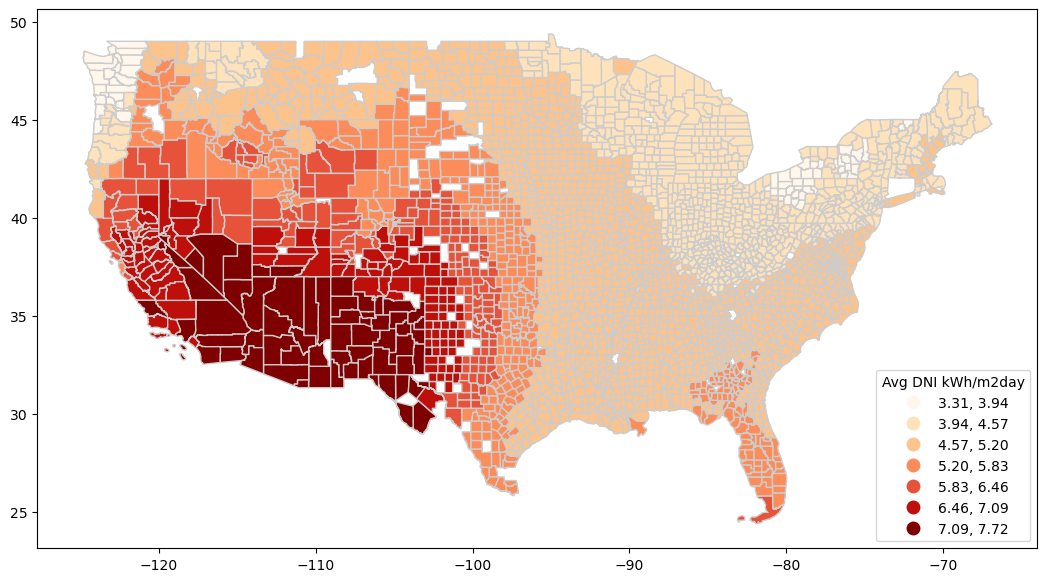

In [41]:
# plot technical potential
fig, axs = plt.subplots(figsize=[14,7])

gdata.plot(ax=axs, column="Average Available DNI kWh/m2day", scheme="equal_interval", k=7, cmap="OrRd", edgecolor="0.8", 
           legend=True, legend_kwds={'loc':'lower right'})
leg1 = axs.get_legend()
leg1.set_title("Avg DNI kWh/m2day")


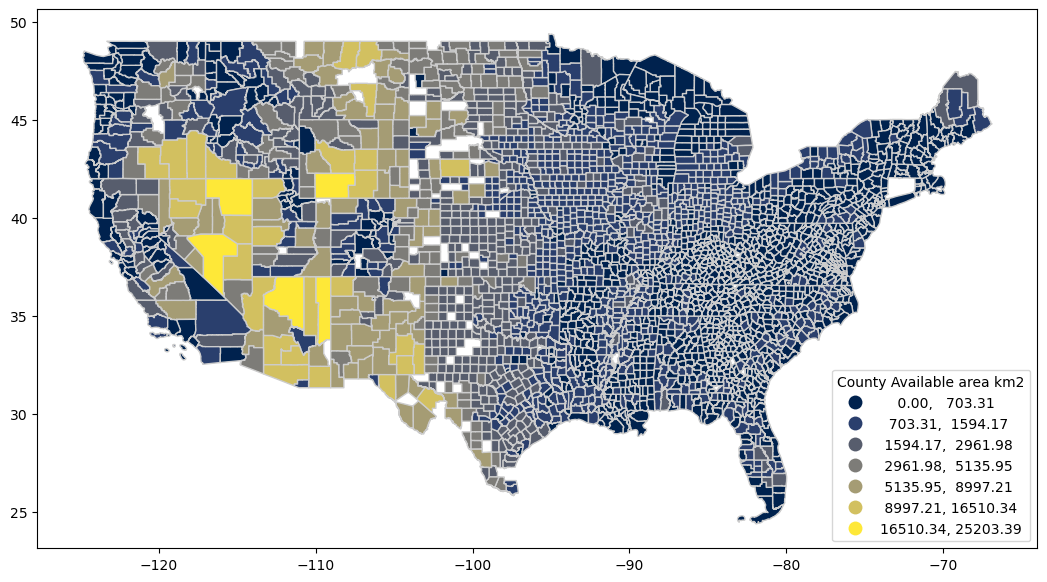

In [42]:
# plot land availability
fig, axs = plt.subplots(figsize=[14,7])

gdata.plot(ax=axs, column="County Available area km2", scheme="natural_breaks", k=7, cmap="cividis", edgecolor="0.8", 
           legend=True, legend_kwds={'loc':'lower right'})
leg1 = axs.get_legend()
leg1.set_title("County Available area km2")

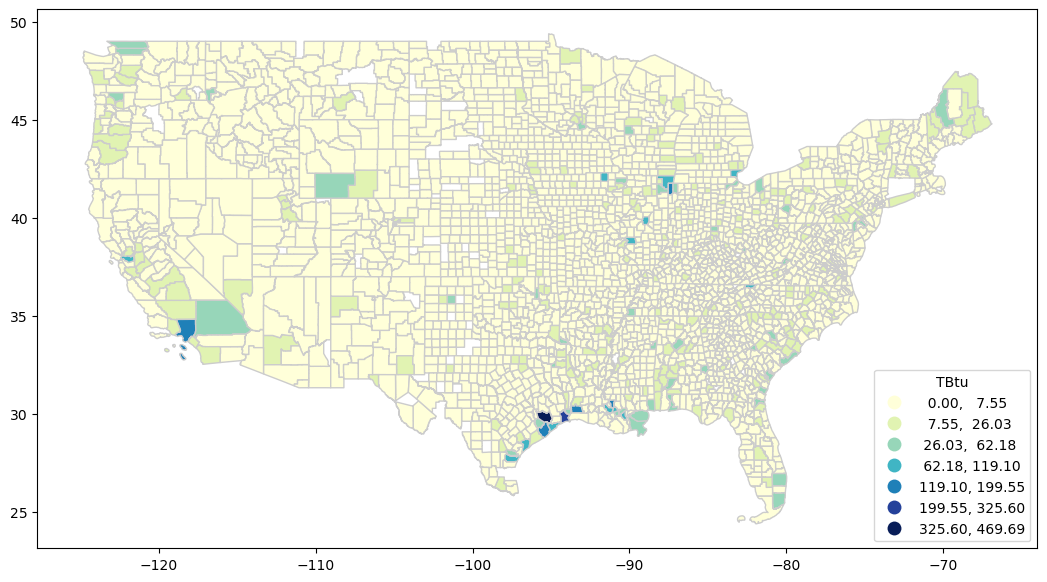

In [37]:
fig, axs = plt.subplots(figsize=[14,7])
# us49.boundary.plot(ax=axs, alpha=alpha, edgecolor=edgecolor)
# gdata.plot(ax=axs, column="TBtu", cmap="YlGnBu", edgecolor="0.5", legend=True)
# gdata.plot(ax=axs, column="TBtu", cmap="YlGnBu", edgecolor="0.5", legend=True)

gdata.plot(ax=axs, column="TBtu", scheme="natural_breaks", k=7, cmap="YlGnBu", edgecolor="0.8", 
           legend=True, legend_kwds={'loc':'lower right'})
leg1 = axs.get_legend()
leg1.set_title("TBtu")
